## Import Libaries

In [64]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Read Image

In [65]:
def read_image():
    path = "/media/rifat/STUDY/4-1/LAB/Image_Processing/image/paddy.jpeg"
    gray = cv.imread(path,0)
    return gray

## Filter Build

In [71]:
def build_gaussian_filter(ncols, nrows):
    sigmax, sigmay = 250, 250
    cx, cy = nrows/2, ncols/2
    x = np.linspace(0, nrows, nrows)
    y = np.linspace(0, ncols, ncols)
    X, Y = np.meshgrid(x, y)
    gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
    return gaussian_filter

In [72]:
def filtering(gray):
    
    ftimg = np.fft.fft2(gray)
    centered_ftimg = np.fft.fftshift(ftimg)
    magnitude_spectrum = 100 * np.log(np.abs(ftimg))
    centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

    c, r = gray.shape
    gaussian_filter = build_gaussian_filter(c, r)

    # Apply Gaussian filter
    ftimg_gf = centered_ftimg * gaussian_filter
    filtered_img = np.abs(np.fft.ifft2(ftimg_gf))
    
    img_set = [gray, magnitude_spectrum, centered_magnitude_spectrum, gaussian_filter, filtered_img]
    title_set = ['Gray', 'FFT2', 'Centered FFT2', 'Gaussian Filter', 'Filtered Img']
    
    show_plot(img_set,title_set)
    

In [73]:
def show_plot(img_set,title_set):
    
    plt.figure(figsize = (20, 10))
    n = len(img_set)
    for i in range(n):
        plt.subplot(2, 3, i + 1)
        plt.title(title_set[i])
        img = img_set[i]
        plt.imshow(img, cmap = 'gray')
        
    plt.show()

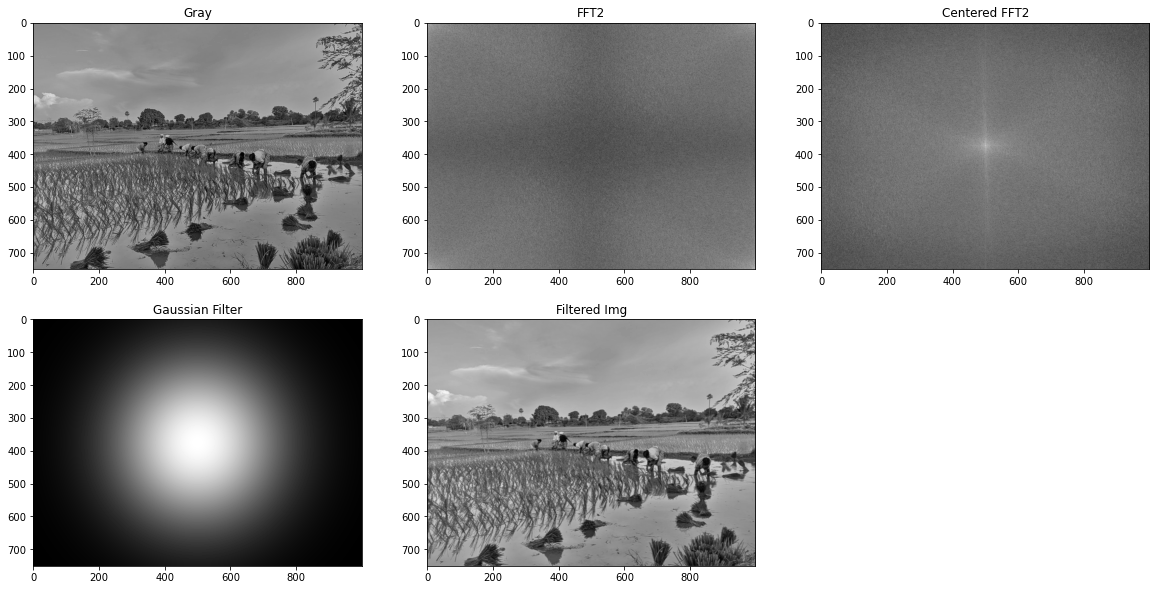

In [74]:
if __name__ == "__main__":
    gray = read_image()
    filtering(gray)
    